In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import string, random
import pandas as pd
import matplotlib.pyplot as plt 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from glob import glob

In [2]:
prjectName = 'colorectal_histology'

# download the dataset
dataset, info = tfds.load(prjectName, split=f'train', as_supervised=True,with_info=True, shuffle_files=True)
dataset = dataset.shuffle(buffer_size=5000,reshuffle_each_iteration = False)
dataset = dataset.map(lambda img, lbl: (tf.cast(img, tf.float32) / 255.0, lbl))
print(f'dataset type {type(dataset)} with {len(dataset)} images')
print(info.supervised_keys)
print(info.features.items())

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [02:38<00:00, 158.53s/ url]

Dl Completed...: 100%|██████████| 1/1 [02:43<00:00, 163.97s/ url]


Dataset colorectal_histology downloaded and prepared to /Users/umberto/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.
dataset type <class 'tensorflow.python.data.ops.dataset_ops.MapDataset'> with 5000 images
('image', 'label')
dict_items([('image', Image(shape=(150, 150, 3), dtype=tf.uint8)), ('label', ClassLabel(shape=(), dtype=tf.int64, num_classes=8)), ('filename', Text(shape=(), dtype=tf.string))])


In [3]:



batch_size = 64
valid_data = dataset.take(1000)

valid_data = valid_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_data       = dataset.skip(1000).take(1000)
test_data       = test_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_data   = dataset.skip(2000).take(3000)
train_data = train_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [4]:

model = tf.keras.Sequential([
        tf.keras.layers.InputLayer((150, 150, 3)),
        tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.AveragePooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(8, activation=tf.keras.activations.softmax)
    ], name='cnn_model')


model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
print(model.summary())


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 17, 17, 128)      0 

In [5]:


# create training callbacks
fullDir = 'assets'
model_name = 'CNN'+''.join(random.sample(string.ascii_lowercase, 12))
earlystop = tf.keras.callbacks.EarlyStopping('val_loss', patience=20, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=f'{fullDir}/ckpts/{prjectName}-{model_name}-' + '{epoch:02d}-{val_accuracy:0.4f}')


In [7]:
# train the model
history = model.fit(train_data, validation_data=valid_data, epochs=10,
                    callbacks=[earlystop, checkpoint])


Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 1.4023 - accuracy: 0.3620INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-01-0.4360/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-01-0.4360/assets


47/47 [==============================] - 45s 941ms/step - loss: 1.4023 - accuracy: 0.3620 - val_loss: 1.1446 - val_accuracy: 0.4360
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 1.1863 - accuracy: 0.4687INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-02-0.4020/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-02-0.4020/assets


47/47 [==============================] - 44s 948ms/step - loss: 1.1863 - accuracy: 0.4687 - val_loss: 1.2005 - val_accuracy: 0.4020
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 1.0457 - accuracy: 0.5240INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-03-0.5210/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-03-0.5210/assets


47/47 [==============================] - 54s 1s/step - loss: 1.0457 - accuracy: 0.5240 - val_loss: 1.0920 - val_accuracy: 0.5210
Epoch 4/10
47/47 [==============================] - ETA: 0s - loss: 1.0431 - accuracy: 0.5413INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-04-0.5420/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-04-0.5420/assets


47/47 [==============================] - 50s 1s/step - loss: 1.0431 - accuracy: 0.5413 - val_loss: 1.0391 - val_accuracy: 0.5420
Epoch 5/10
47/47 [==============================] - ETA: 0s - loss: 0.9624 - accuracy: 0.5857INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-05-0.5190/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-05-0.5190/assets


47/47 [==============================] - 46s 977ms/step - loss: 0.9624 - accuracy: 0.5857 - val_loss: 1.1195 - val_accuracy: 0.5190
Epoch 6/10
47/47 [==============================] - ETA: 0s - loss: 0.9861 - accuracy: 0.5693INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-06-0.5570/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-06-0.5570/assets


47/47 [==============================] - 46s 979ms/step - loss: 0.9861 - accuracy: 0.5693 - val_loss: 0.8695 - val_accuracy: 0.5570
Epoch 7/10
47/47 [==============================] - ETA: 0s - loss: 0.8870 - accuracy: 0.6137INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-07-0.6420/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-07-0.6420/assets


47/47 [==============================] - 47s 997ms/step - loss: 0.8870 - accuracy: 0.6137 - val_loss: 0.8655 - val_accuracy: 0.6420
Epoch 8/10
47/47 [==============================] - ETA: 0s - loss: 0.9039 - accuracy: 0.6237INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-08-0.5520/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-08-0.5520/assets


47/47 [==============================] - 47s 997ms/step - loss: 0.9039 - accuracy: 0.6237 - val_loss: 1.1563 - val_accuracy: 0.5520
Epoch 9/10
47/47 [==============================] - ETA: 0s - loss: 0.9108 - accuracy: 0.6103INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-09-0.5700/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-09-0.5700/assets


47/47 [==============================] - 48s 1s/step - loss: 0.9108 - accuracy: 0.6103 - val_loss: 1.1550 - val_accuracy: 0.5700
Epoch 10/10
47/47 [==============================] - ETA: 0s - loss: 0.8780 - accuracy: 0.6227INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-10-0.6780/assets


INFO:tensorflow:Assets written to: C:/myfiles/myProjexts/myFiles/myProjects/venv/projects/colorectal_histology/ckpts/colorectal_histology-CNNtvdeqpnohmsf-10-0.6780/assets


47/47 [==============================] - 47s 998ms/step - loss: 0.8780 - accuracy: 0.6227 - val_loss: 0.7852 - val_accuracy: 0.6780


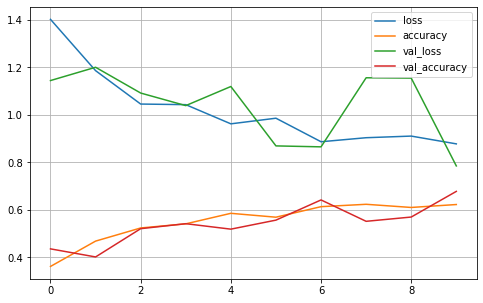

16/16 [==============================] - 3s 205ms/step - loss: 0.7474 - accuracy: 0.6920
[0.7474365234375, 0.6919999718666077]


In [48]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()
print(model.evaluate(test_data))


In [9]:

test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy:{test_acc * 100:.2f}%')

16/16 [==============================] - 3s 193ms/step - loss: 0.7474 - accuracy: 0.6920
Test accuracy:69.20%


# Load large images

In [15]:
base_tile_dir = os.path.join('', '../data/large_images')

big_image_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir,  '*.tif'))
})

print(big_image_df.iloc[0])
big_image_df['image'] = big_image_df['path'].map(plt.imread)

path    ../data/large_images/CRC-Prim-HE-06_APPLICATIO...
Name: 0, dtype: object


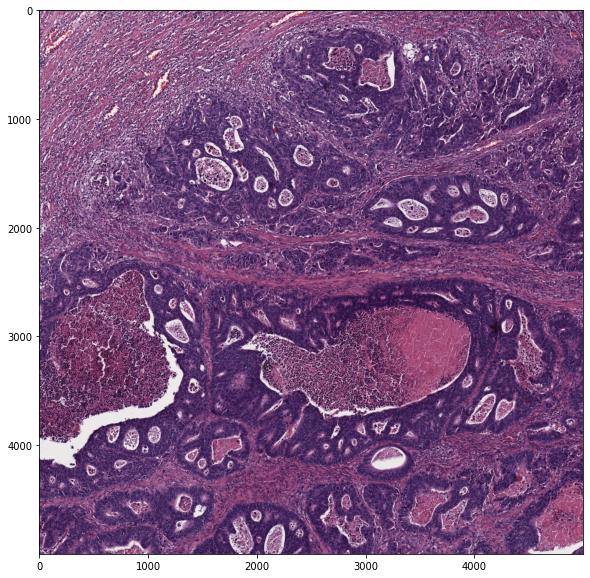

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(big_image_df['image'].iloc[2])
plt.show()

In [49]:
# Choose the large image that we want to check
image_idx = 2
large_img =  big_image_df['image'].iloc[image_idx] / 255.0
#print(large_img)

# Each model has been trained on images 150x150. The models
# trained with the CSV files, has been trained with those images
# that have been reduced in size and that have been made (if the name
# ends in L) black and white. This is why we need the following constants
# to reshape and conver the portions of the large image.
size_x = 150
size_y = 150
size_red_x = 8
size_red_y = 8
# Now we iterate over small portions of the large image and always apply our classifier.
num_x = int(5000/size_x)
num_y = int(5000/size_y)
#print(num_x, num_y)

print("Number of predictions: ", num_x*num_y)

preds_list = []
for ix in range (num_x):
    for iy in range (num_y):
        portion = large_img[ix*size_x: (ix+1)*size_x, iy*size_y: (iy+1)*size_y,:]
        #print(portion.shape)

        # Now we will reduce the image size to size_red_x x size_red_y
        #img = Image.fromarray(np.uint8(portion)) # Convert the array to PIL image format
        #imgL = img.convert("L") # Convert to gray levels, since we are going to use a model trained with gray images
        #imgLR = imgL.resize ((8,8)) # reshape to 8x8
        imgLR_array = np.expand_dims(portion, axis = 0)
        #print(imgLR_array.shape)
        
        pred_ = model.predict(imgLR_array) # We get the highest probabilty value predicted
        preds_list.append(pred_[0,0]) # We put the probability value in a list that we will use later

# Now we create the mask that we will overimpose on the image
mask_image = np.zeros((large_img.shape[0], large_img.shape[1])) # The mask image will have only one color channel
for ix in range (num_x):
    for iy in range (num_y):
        mask_image[ix*size_x: (ix+1)*size_x, iy*size_y: (iy+1)*size_y] = preds_list[iy+ix*num_x]

Number of predictions:  1089


In [50]:
pred_

array([[4.7429716e-03, 4.5593145e-01, 4.3691650e-01, 9.2900600e-03,
        6.3489512e-02, 2.9546428e-02, 4.6105815e-05, 3.6953625e-05]],
      dtype=float32)

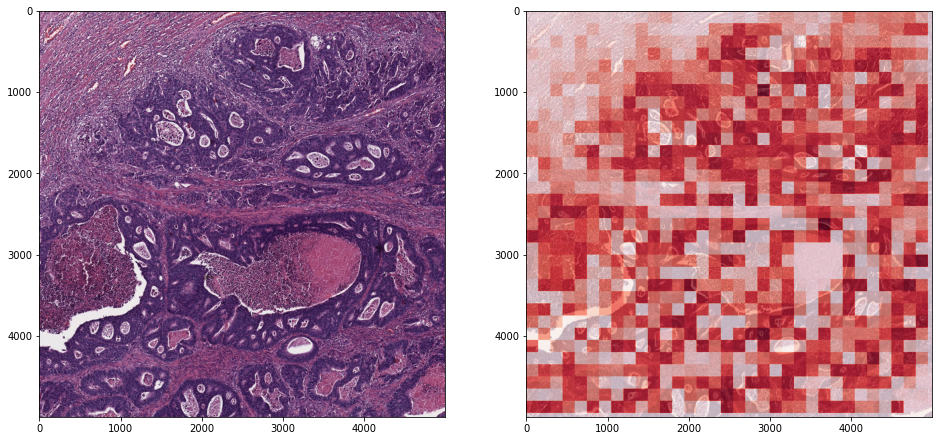

In [51]:
fig = plt.figure(figsize = (16,8))
plt.subplot(121)
plt.imshow(large_img)
plt.subplot(122)
plt.imshow(large_img)
plt.imshow(mask_image, alpha = 0.7, cmap = "Reds")